## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x625ad70>

In [2]:
autofile_path = r'C:\Users\student\Documents\Python Scripts\datasets\auto.csv'
auto = pd.read_csv (autofile_path)
print (auto.info ())
auto.head (10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
origin    392 non-null object
size      392 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB
None


,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0
5,32.9,119.0,100,2615,14.8,Asia,10.0
6,32.2,108.0,75,2265,15.2,Asia,10.0
7,22.0,121.0,76,2511,18.0,Europe,10.0
8,15.0,302.0,130,4295,14.9,US,20.0
9,17.0,302.0,140,3449,10.5,US,20.0


['US' 'Asia' 'Europe'] 3


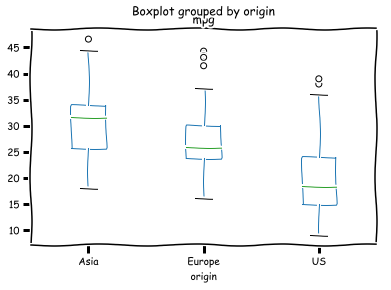

In [3]:
print (auto['origin'].unique (), len (auto['origin'].unique ()))
auto.boxplot ('mpg', 'origin')

In [4]:
autorigin = pd.get_dummies (auto)
autorigin.head (10)

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0
5,32.9,119.0,100,2615,14.8,10.0,1,0,0
6,32.2,108.0,75,2265,15.2,10.0,1,0,0
7,22.0,121.0,76,2511,18.0,10.0,0,1,0
8,15.0,302.0,130,4295,14.9,20.0,0,0,1
9,17.0,302.0,140,3449,10.5,20.0,0,0,1


In [5]:
autorigin.drop('origin_US', axis = 1, inplace = True)
autorigin.head (10)

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe
0,18.0,250.0,88,3139,14.5,15.0,0,0
1,9.0,304.0,193,4732,18.5,20.0,0,0
2,36.1,91.0,60,1800,16.4,10.0,1,0
3,18.5,250.0,98,3525,19.0,15.0,0,0
4,34.3,97.0,78,2188,15.8,10.0,0,1
5,32.9,119.0,100,2615,14.8,10.0,1,0
6,32.2,108.0,75,2265,15.2,10.0,1,0
7,22.0,121.0,76,2511,18.0,10.0,0,1
8,15.0,302.0,130,4295,14.9,20.0,0,0
9,17.0,302.0,140,3449,10.5,20.0,0,0


In [6]:
x = autorigin.drop('mpg', axis = 1).values
y = autorigin['mpg'].values

print (x.shape, y.shape)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 15)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

from sklearn.linear_model import LinearRegression

lr = LinearRegression ()
lr.fit (x_train, y_train)
print ('Score:',lr.score (x_test, y_test))

(392, 7) (392,)
(274, 7) (274,)
(118, 7) (118,)
Score: 0.7292114498028336


## Assignment #1
1. Load the data gapminder.csv
2. Use pandas to create a boxplot showing the variation of life expectancy ('life') by region ('Region').
3. Use the get_dummies function to create dummy variables for the dataframe.
4. Remove one extra dummy column
5. Do a linear Regression on the dataset and caculate the score.
6. Make some plots which you like by yourself.

## Loading the dataset

In [7]:
gmfile_path = r'C:\Users\student\Documents\Python Scripts\datasets\gm_2008_region.csv'

gap = pd.read_csv (gmfile_path)
print (gap.info ())
print (gap.shape)
gap.head (10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.4+ KB
None
(139, 10)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.10,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.00,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.50,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.10,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.10,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
5,8331465.0,1.41,0.30,8.183160,26.46741,43952.0,124.1394,80.4,4.6,Europe & Central Asia
6,8868713.0,1.99,0.10,5.109538,25.65117,14365.0,128.6024,70.6,43.3,Europe & Central Asia
7,348587.0,1.89,3.10,3.131921,27.24594,24373.0,124.3862,72.2,14.5,America
8,148252473.0,2.38,0.06,0.319161,20.39742,2265.0,125.0307,68.4,55.9,South Asia
9,277315.0,1.83,1.30,6.008279,26.38439,16075.0,126.3940,75.3,15.4,America


In [8]:
gap.describe ()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


## Plotting life v/s Region

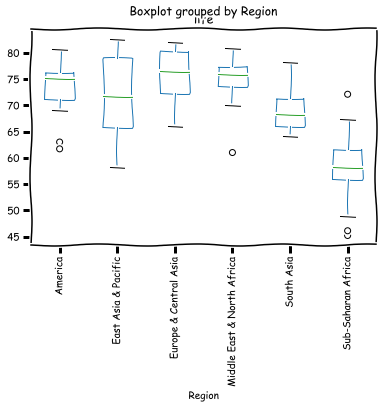

In [9]:
gap.boxplot ('life', 'Region', rot = 90)

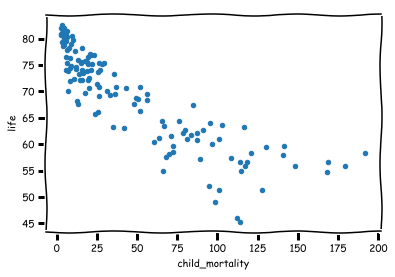

In [10]:
gap.plot.scatter ('child_mortality', 'life')

## Separating categorial features and changing values into numeric type

In [11]:
gap_Region = pd.get_dummies (gap)
gap_Region.head ()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


## Dropping region: Sub-Saharan Africa

In [12]:
gap_Region.drop ('Region_Sub-Saharan Africa', axis = 1, inplace = True)
print (gap_Region.shape)
gap_Region.head ()

(139, 14)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0


## Splitting dataset, training regression model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = gap_Region.drop('life', axis = 1).values
Y = gap_Region['life'].values

print (X.shape, Y.shape)

# for test_size 0.2, seed = 15 best score!!
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.2, random_state = 15)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


lr = LinearRegression ()
lr.fit (x_train, y_train)
predictions = lr.predict(x_test)
print ('Score:',lr.score (x_test, y_test))

(139, 13) (139,)
(111, 13) (111,)
(28, 13) (28,)
Score: 0.9446851248573285


## Plotting score v/s random_state

0.9047219333435935
15


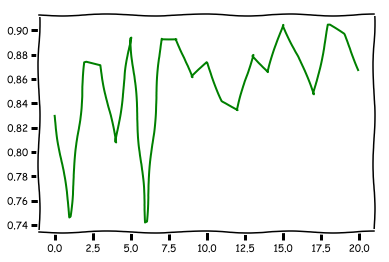

In [14]:
score = []
for i in range (21):
    x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = 0.3, random_state = i)
    lr = LinearRegression ()
    lr.fit (x_train, y_train)
    score.append (lr.score (x_test, y_test))
    
print (max (score))
for i in range (21):
    if score[i] == max (score):
        print (i)
        break

plt.plot (range (21), score, c='g')

## Plotting score v/s test_size

0.9446851248573285
0.2


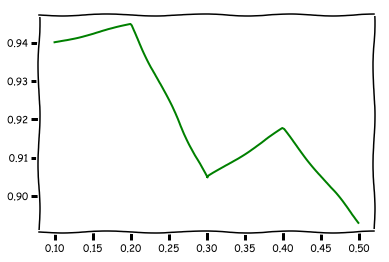

In [15]:
score = []
test_range = [0.1, 0.2, 0.3, 0.4, 0.5]
for t in test_range:
    x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size = t, random_state = 15)
    lr = LinearRegression ()
    lr.fit (x_train, y_train)
    score.append (lr.score (x_test, y_test))
    
print (max (score))
for i in range (len (test_range)):
    if score[i] == max (score):
        print (test_range[i])
        break

plt.plot (test_range, score, c='g')

In [16]:
diabfile_path = r'..\datasets\diabetes.csv'
diabetes = pd.read_csv (diabfile_path)
print (diabetes.info ())
diabetes.head (10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB
None


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [17]:
cols = diabetes.columns[1:8]
print (cols)
for i in cols:
    print (i, diabetes[diabetes[i] == 0].count ().min ())

Index(['glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age'], dtype='object')
glucose 5
diastolic 35
triceps 227
insulin 374
bmi 11
dpf 0
age 0


In [18]:
for i in cols:
    diabetes[i].replace (0, np.nan, inplace = True)
print (diabetes.isnull ().sum ())

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64


In [19]:
diabetes.head (10)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [20]:
from sklearn.preprocessing import Imputer

x = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

imp = Imputer (missing_values = 'NaN', strategy = 'median', axis = 0)
imp.fit (x)
x = imp.transform (x)
print (np.isnan (x).sum ())

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 15)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier (n_neighbors = 5)
knn.fit (x_train, y_train)
print (knn.score (x_test, y_test))

0
(537, 8) (537,)
(231, 8) (231,)
0.7186147186147186


## Assignment #2

1. Load the voting datasets (called as house representatives)
2. Find how all the missing values are represented
3. Take one type of missing value and convert it to NaN
4. Count the number of nulls using isnull() and sum()
5. Drop the rows using dropna
6. Use Imputer to replace the missing values with most_frequent
7. Use pipeline to create a pipeline and do classification.
8. Use the fit and predict to get the accuracy.

In [21]:
votefile_path = r'C:\Users\student\Documents\Python Scripts\datasets\house-votes-84.csv'

vote = pd.read_csv (votefile_path)
print (vote.info ())
vote.head (10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                                     435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [22]:
cols = vote.columns[1:]
print (cols)
for i in cols:
    print (min (vote[vote[i] == '?'].count ()))

Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')
12
48
11
11
15
11
14
15
22
7
21
31
25
17
28
104


In [23]:
for i in cols:
    vote[i].replace ('?', np.nan, inplace = True)
print (vote.isnull ().sum ())
print (vote.shape)

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64
(435, 17)


In [24]:
vote.replace ('y', 1, inplace = True)
vote.replace ('n', 0, inplace = True)
vote.head (10)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [25]:
vote.dropna (inplace = True)
print (vote.isnull ().sum ())
print (vote.shape)

party                                     0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64
(232, 17)


In [26]:
from sklearn.preprocessing import Imputer

X = vote.iloc[:, 1:]
Y = vote.iloc[:, 0]

imp = Imputer (missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
imp.fit (X)
imp.transform (X)

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [27]:
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

steps = [('imp', Imputer (missing_values = 'NaN', strategy = 'most_frequent', axis = 0)),
         ('clsf', KNeighborsClassifier (n_neighbors = 10))]

pipeline =  Pipeline (steps)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state = 15)

pipeline.fit (X_train, Y_train)
pipeline.predict (X_test)
print ('Score:', pipeline.score (X_test, Y_test))

Score: 0.9428571428571428


In [28]:
winefile_path = r'C:\Users\student\Documents\Python Scripts\datasets\winequality-red.csv'

wineq = pd.read_csv (winefile_path, sep = ';')
print (wineq.info ())
wineq.head (10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [29]:
wineq.describe ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler ()

knn = KNeighborsClassifier (n_neighbors = 7)

from sklearn.pipeline import Pipeline

steps = [('scale', scaler),
         ('clf', knn)]

pipeline = Pipeline (steps)

x = wineq.loc[:, :'alcohol']
y = wineq.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_test, x_train, y_test, y_train = train_test_split (x, y, test_size = 0.3, random_state = 15)

pipeline.fit (x_train, y_train)
pipeline.predict (x_test)
print ('Score:', pipeline.score (x_test, y_test))

Score: 0.5460232350312779


In [31]:
# comparing with only knn

knn2 = KNeighborsClassifier (n_neighbors = 7)
knn2.fit (x_train, y_train)
print ('Score:', knn2.score (x_test, y_test))

Score: 0.48882931188561213


## Assignment #3

1. Load the white wine datasets
2. Look for the features, if there are any anamoly
3. Scale the features using ``scale ()`` funciton
4. Check the values of mean and std of the transformed object
5. Create a pipeline with Scaling and Knearest neighbors
6. Now compute the accuracy with the scaled models and unscaled models

In [32]:
winefile_path = r'C:\Users\student\Documents\Python Scripts\datasets\white-wine.csv'

wine = pd.read_csv (winefile_path)
print (wine.info ())
wine.head (10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.2 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [33]:
wine.describe ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [34]:
print (wine.quality.unique ())

[6 5 7 8 4 3 9]


In [35]:
from sklearn.preprocessing import scale
help (scale)

Help on function scale in module sklearn.preprocessing.data:

scale(X, axis=0, with_mean=True, with_std=True, copy=True)
    Standardize a dataset along any axis
    
    Center to the mean and component wise scale to unit variance.
    
    Read more in the :ref:`User Guide <preprocessing_scaler>`.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}
        The data to center and scale.
    
    axis : int (0 by default)
        axis used to compute the means and standard deviations along. If 0,
        independently standardize each feature, otherwise (if 1) standardize
        each sample.
    
    with_mean : boolean, True by default
        If True, center the data before scaling.
    
    with_std : boolean, True by default
        If True, scale the data to unit variance (or equivalently,
        unit standard deviation).
    
    copy : boolean, optional, default True
        set to False to perform inplace row normalization and avoid a
        copy (if the i